<img src='../frameworks/img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_OLCI_CHL_comparison.ipynb"><< Comparing OLCI chlorophyll products</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://trainhub.eumetsat.int/ocean/sensors/1_7_OLCI_light_environment.ipynb"><img src="https://img.shields.io/badge/Launch-TrainHub-Blue.svg" alt="Open in TrainHub"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://mybinder.org/v2/gl/eumetlab%2Focean%2Fsensors%2Flearn-olci/main?labpath=1_OLCI_introductory/1_7_OLCI_light_environment.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://colab.research.google.com/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_7_OLCI_light_environment.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://studiolab.sagemaker.aws/import/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_7_OLCI_light_environment.ipynb"><img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In Studio Lab"/></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/eumetlab/ocean/sensors/learn-olci&urlpath=1_OLCI_introductory/1_7_OLCI_light_environment.ipynb&branch=main"><img src="https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft" alt="Open in Planetary Computer"/></a></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **[1_1_OLCI_data_access.ipynb](1_1_OLCI_data_access.ipynb)** (this will download the required OLCI products for this notebook)

</div>
<hr>

# 1.7 Assessing the light environment

### Data used

| Product Description  | Data Store collection ID|  WEkEO HDA ID | Product Navigator |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution  | EO:EUM:DAT:0407 | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced) |

### Learning outcomes

At the end of this notebook you will know;
* Objective


### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Light and transparency](#section1)
 1. [Photosynthetically Active Radiation (PAR)](#section2)
 1. [Light attenuation at 490 nm (Kd490)](#section3)

<hr>

In [1]:
import cartopy.crs as ccrs
import eumartools
import glob
import inspect
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os
import warnings
import xarray as xr
import cmocean

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Light and transparency
[Back to top](#TOC_TOP)

</div>

blurb

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Photosynthetically Active Radiation (PAR)
[Back to top](#TOC_TOP)

</div>

In [2]:
SAFE_directory = os.path.join(os.getcwd(), 'products',
    'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3')

flag_file = os.path.join(SAFE_directory,'wqsf.nc')

In [3]:
grid_reduce = 5

In [4]:
geo_file = os.path.join(SAFE_directory,'geo_coordinates.nc')
geo_fid = xr.open_dataset(geo_file)
lon = geo_fid.longitude.data[::grid_reduce, ::grid_reduce]
lat = geo_fid.latitude.data[::grid_reduce, ::grid_reduce]
geo_fid.close()

In [5]:
# reading masks: example land
land_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND'])
land_mask = land_mask.astype(float)[::grid_reduce, ::grid_reduce]
land_mask[land_mask == 0.0] = np.nan

In [6]:
# reading masks: example cloud
cloud_mask = eumartools.flag_mask(flag_file, 'WQSF', ['CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN'])
cloud_mask = cloud_mask.astype(float)[::grid_reduce, ::grid_reduce]
cloud_mask[cloud_mask == 0.0] = np.nan

In [7]:
# reading masks: PAR recommended
PAR_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'AC_FAIL',
                                                    'WHITECAPS', 'ADJAC', 'RWNEG_O2', 'RWNEG_O3',
                                                    'RWNEG_O4', 'RWNEG_O5', 'RWNEG_O6', 'RWNEG_O7', 'RWNEG_O8',
                                                    'PAR_FAIL'])
PAR_mask = PAR_mask.astype(float)[::grid_reduce, ::grid_reduce]
PAR_mask[PAR_mask == 0.0] = np.nan

In [8]:
band_vars = xr.open_mfdataset(glob.glob(os.path.join(SAFE_directory,'par.nc')))
band_vars.close()

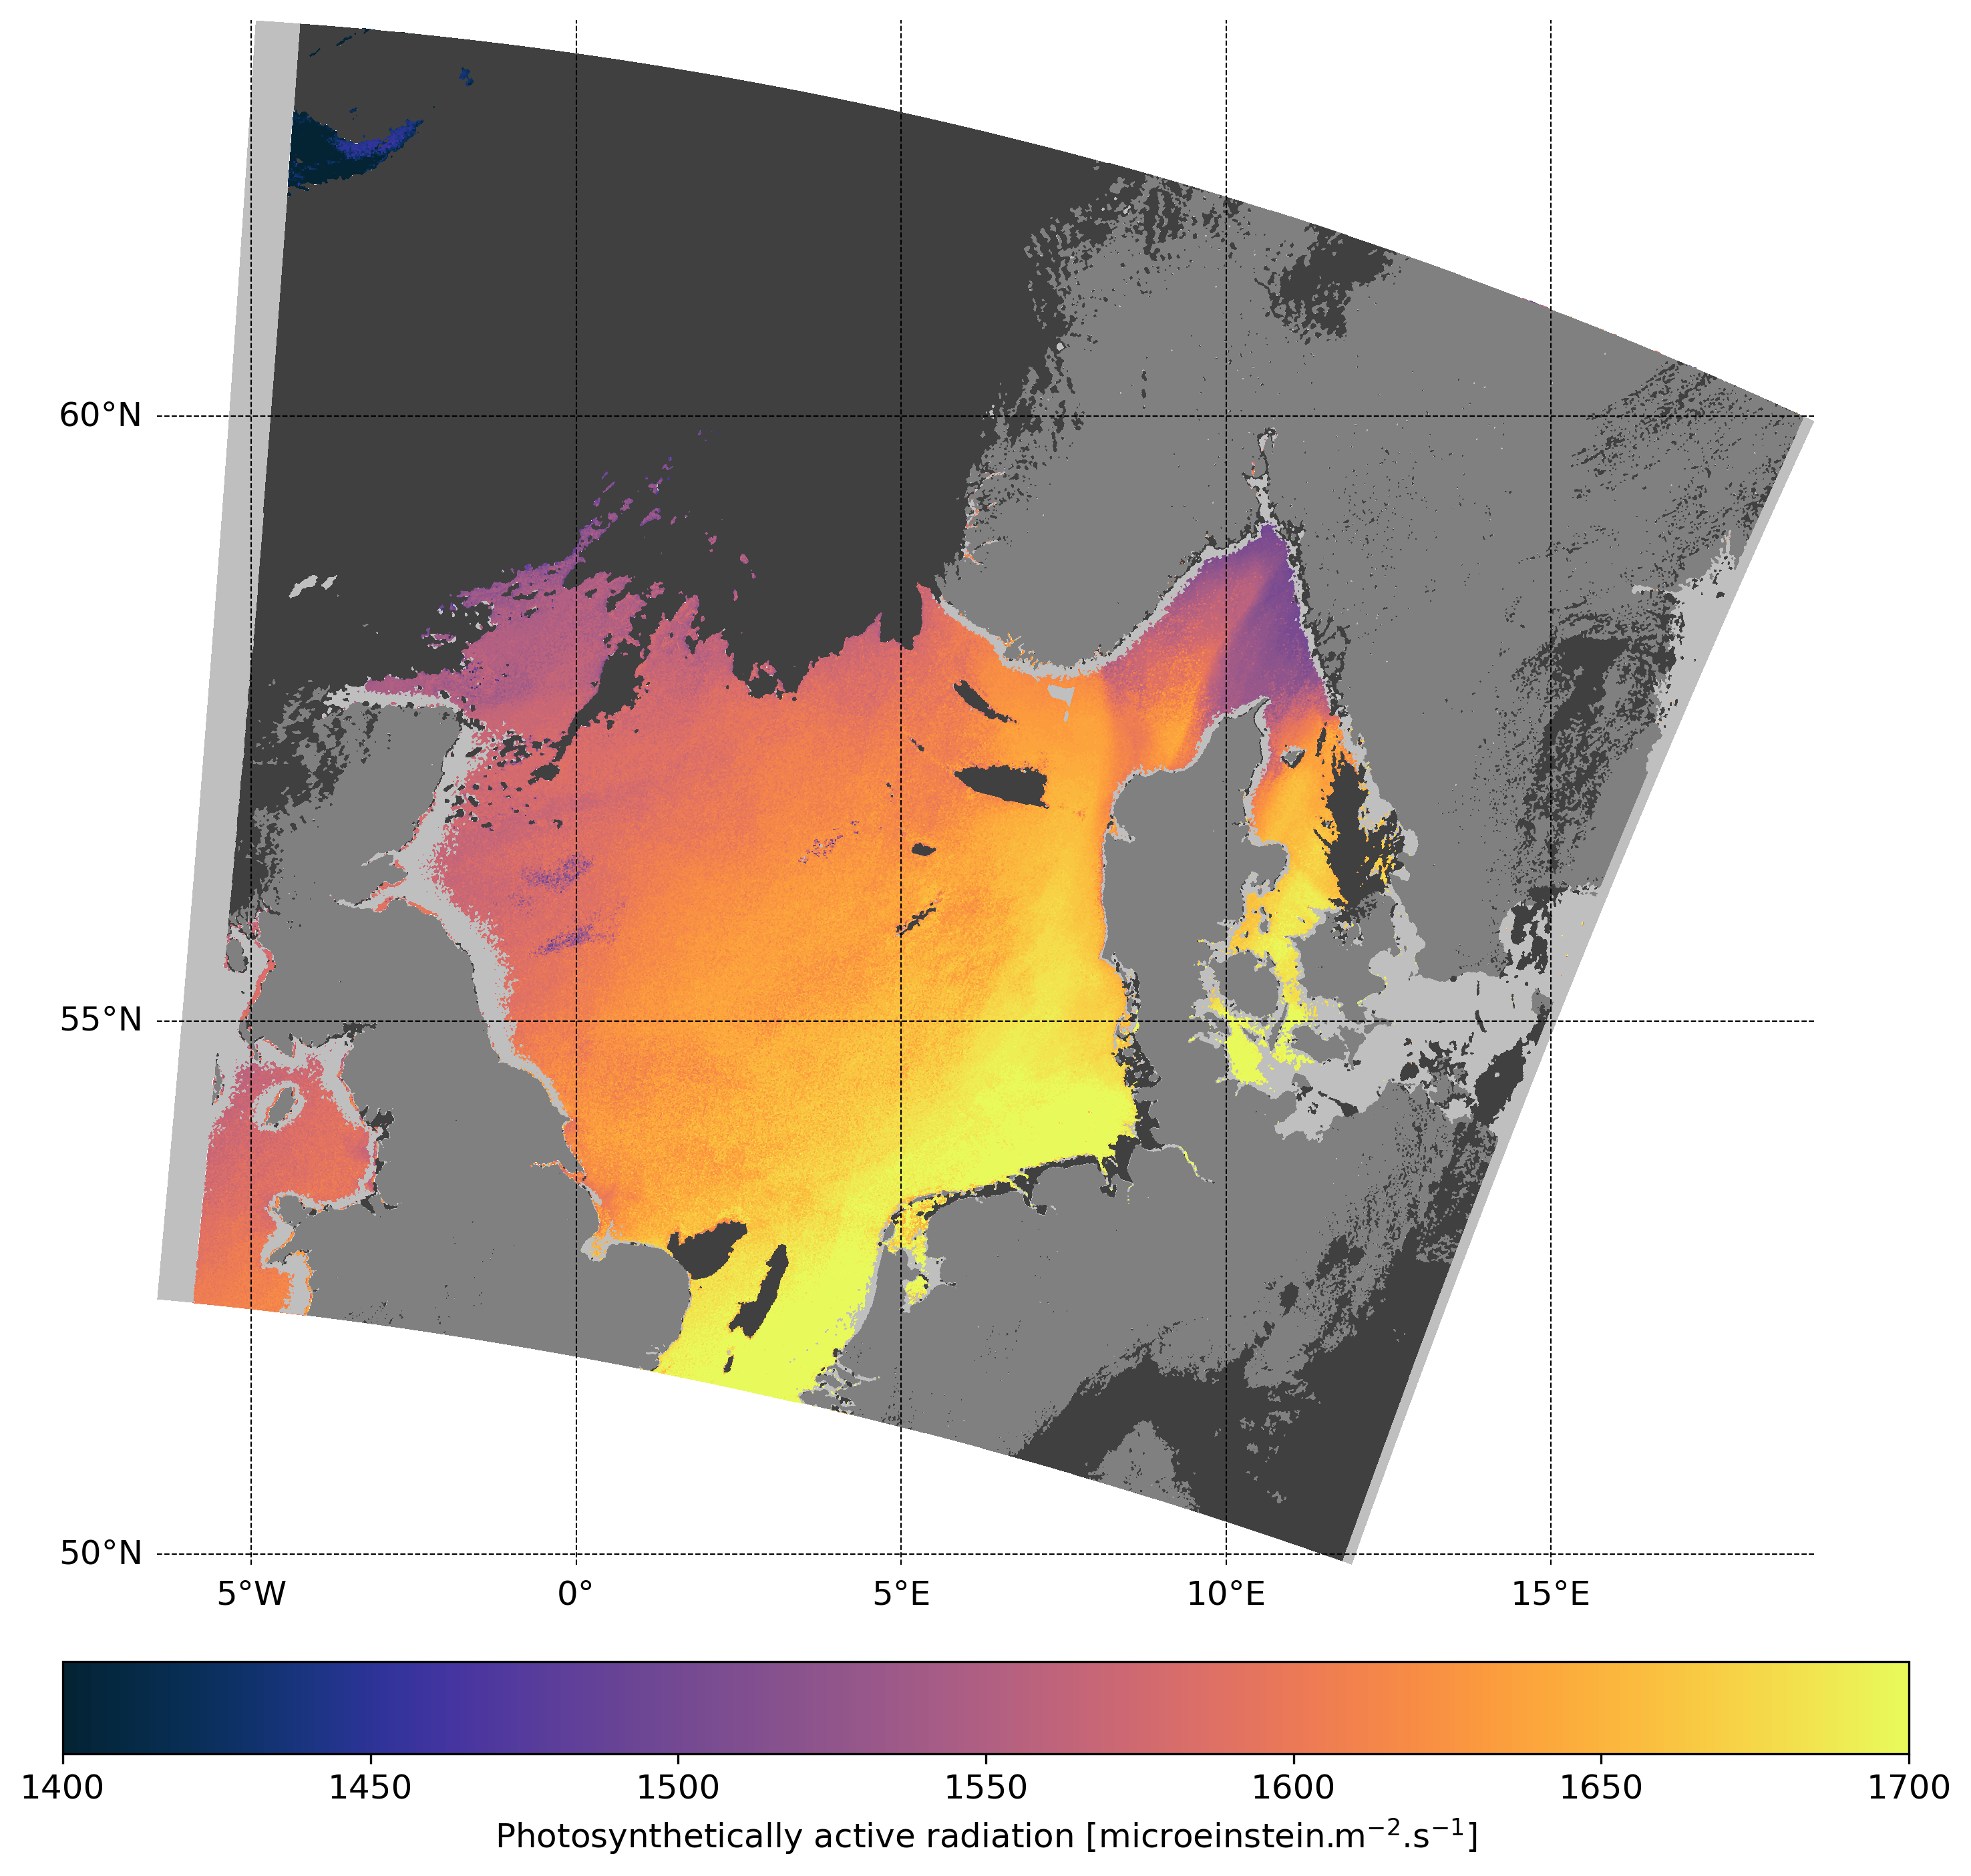

In [9]:
fig = plt.figure(figsize=(10, 10), dpi=300)
m = plt.subplot(projection=ccrs.Mercator())

p1 = m.pcolormesh(lon, lat, band_vars["PAR"][::grid_reduce, ::grid_reduce], transform=ccrs.PlateCarree(), 
                   cmap=cmocean.cm.thermal, vmin=1400, vmax=1700, zorder=1)

m.contourf(lon, lat, PAR_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.75', zorder=2)
m.contourf(lon, lat, cloud_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.25', zorder=3)
m.contourf(lon, lat, land_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.5', zorder=4)

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 5))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 5))
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
m.set(facecolor = "1.0")
m.axis('off')

cbar = fig.colorbar(p1, location='bottom', pad=0.05)
cbar.set_label('Photosynthetically active radiation [microeinstein.m$^{-2}$.s$^{-1}$]')

plt.tight_layout()
plt.savefig('1_7_OLCI_PAR.png', bbox_inches='tight')

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Light attenuation at 490 nm (Kd490)
[Back to top](#TOC_TOP)

</div>

In [10]:
band_vars2 = xr.open_mfdataset(glob.glob(os.path.join(SAFE_directory,'trsp.nc')))
band_vars2.close()

In [11]:
# reading masks: PAR recommended
KDM_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'AC_FAIL',
                                                    'WHITECAPS', 'ADJAC', 'RWNEG_O2', 'RWNEG_O3',
                                                    'RWNEG_O4', 'RWNEG_O5', 'RWNEG_O6', 'RWNEG_O7', 'RWNEG_O8',
                                                    'KDM_FAIL'])
KDM_mask = KDM_mask.astype(float)[::grid_reduce, ::grid_reduce]
KDM_mask[KDM_mask == 0.0] = np.nan

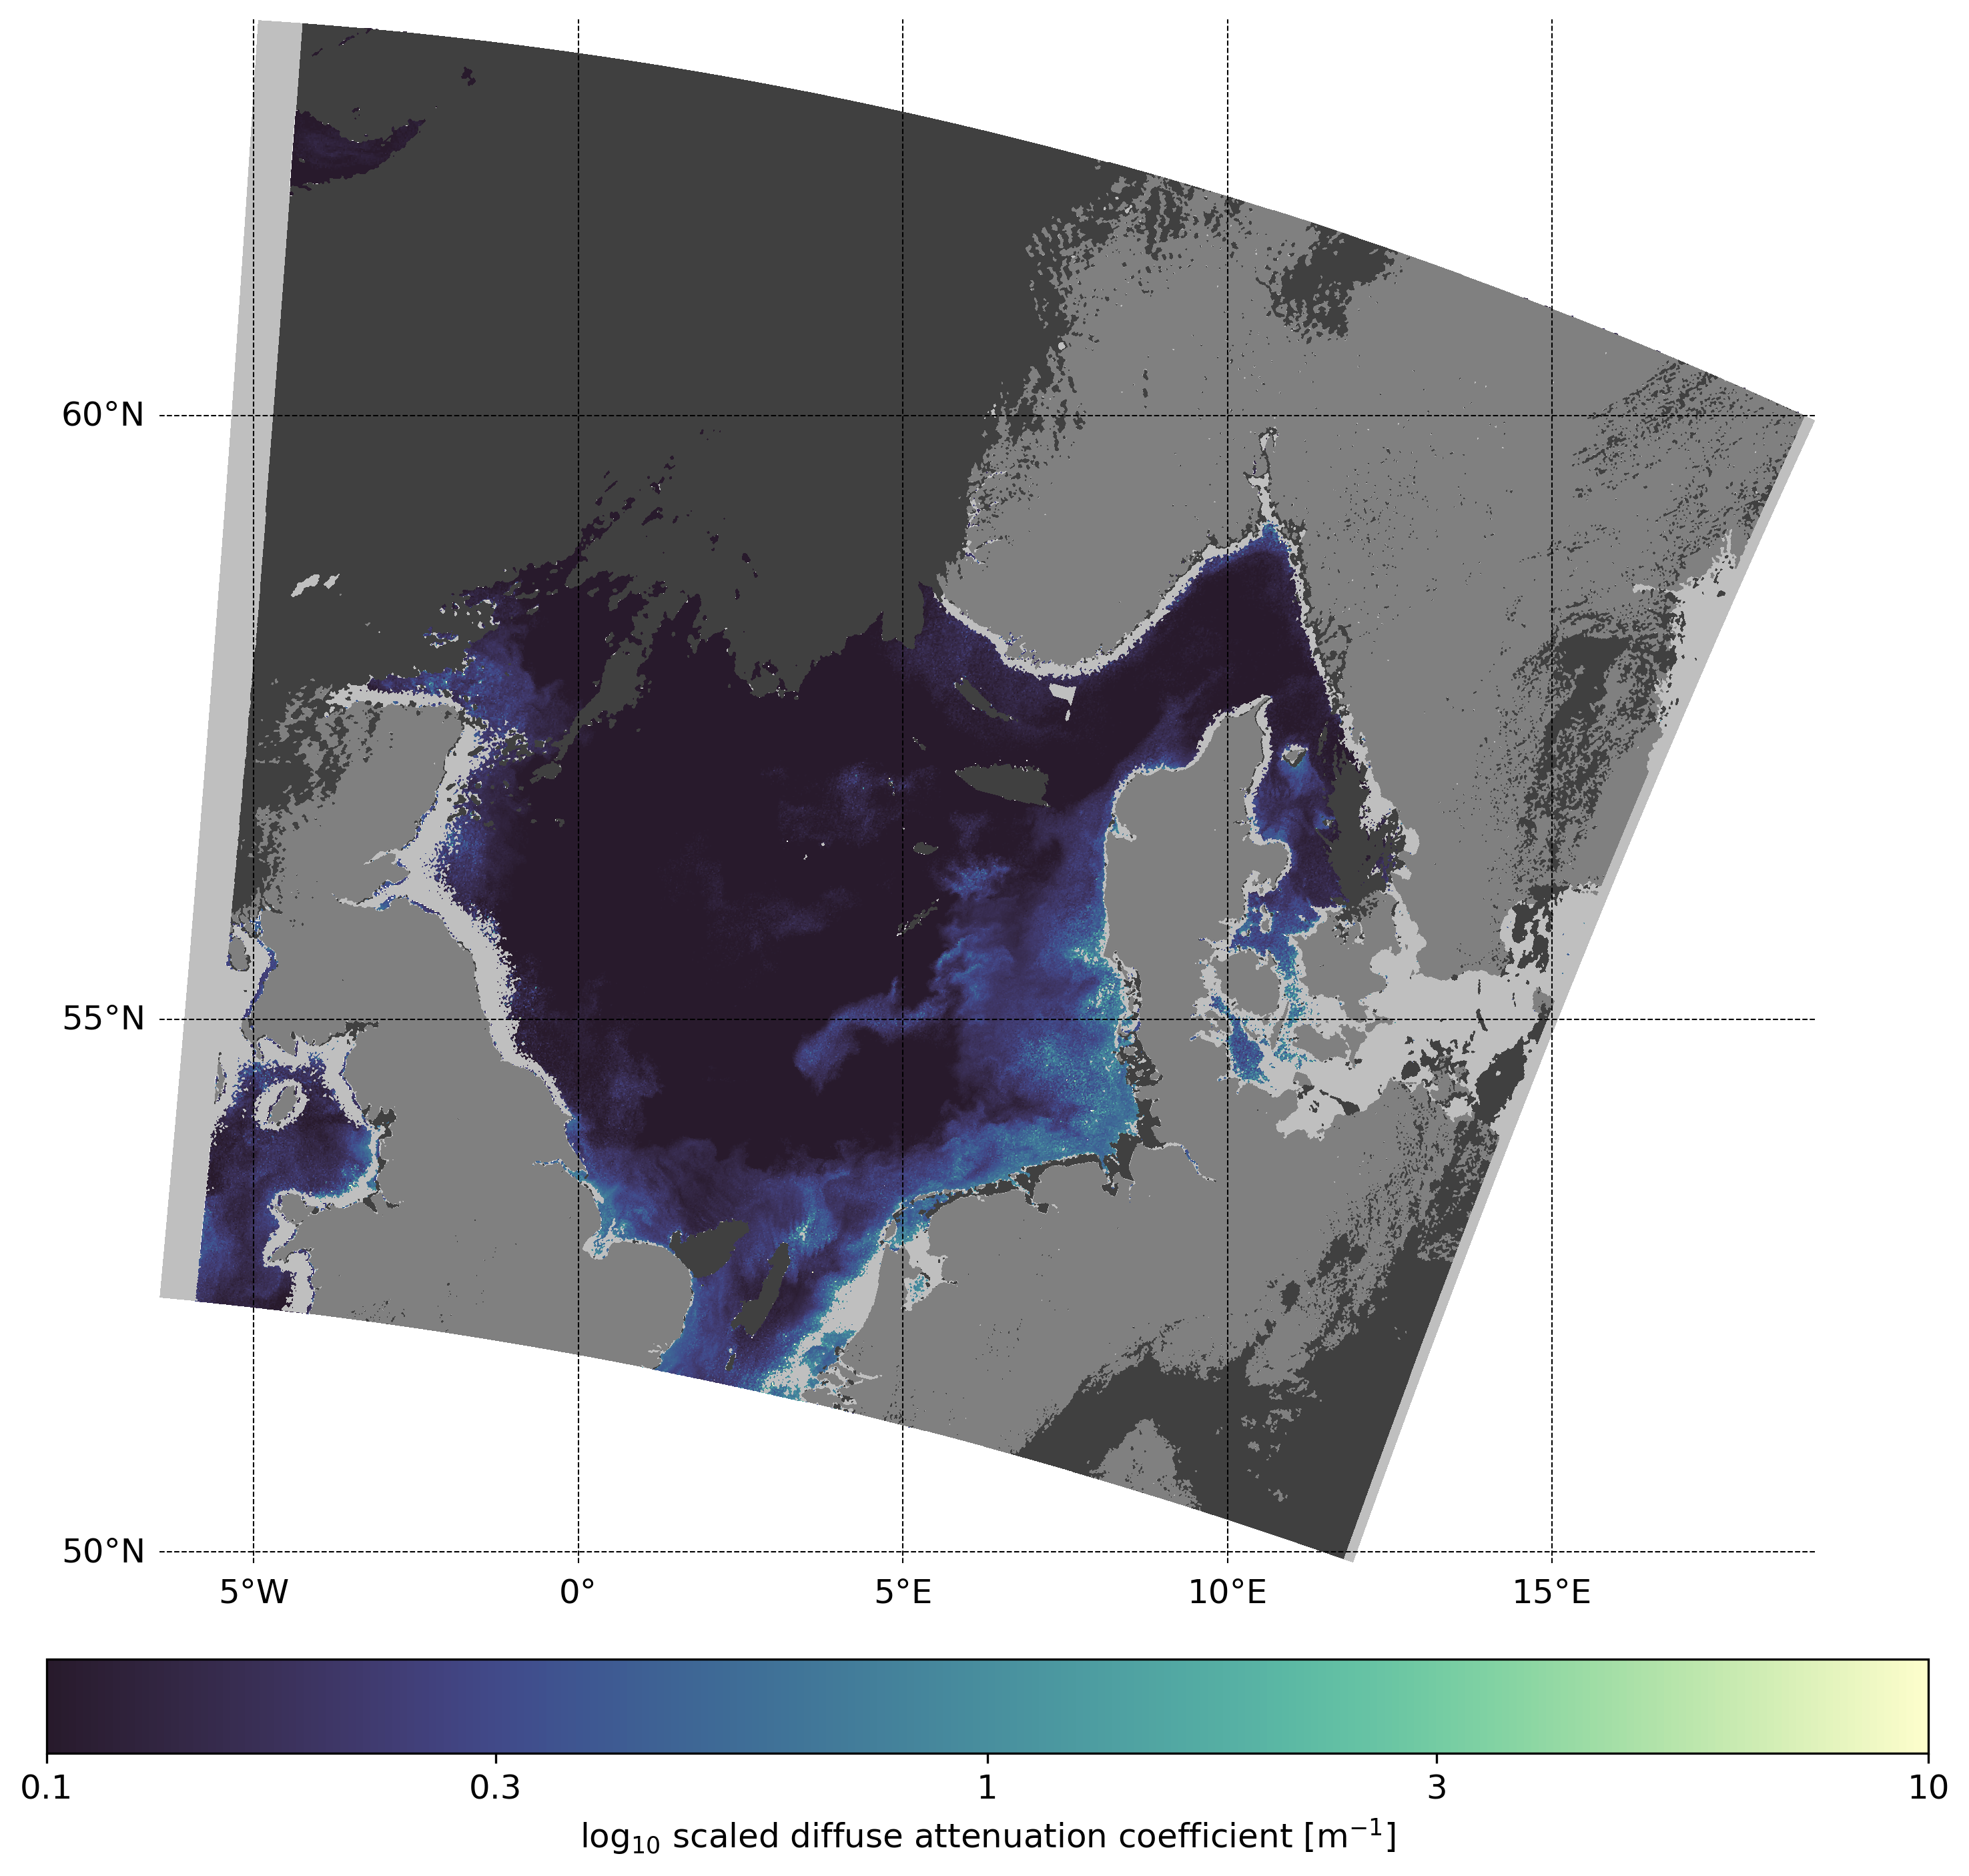

In [12]:
fig = plt.figure(figsize=(10, 10), dpi=300)
m = plt.subplot(projection=ccrs.Mercator())

p1 = m.pcolormesh(lon, lat, band_vars2["KD490_M07"][::grid_reduce, ::grid_reduce], transform=ccrs.PlateCarree(), 
                   cmap=cmocean.cm.deep_r, vmin=-1, vmax=1)

m.contourf(lon, lat, KDM_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.75', zorder=2)
m.contourf(lon, lat, cloud_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.25', zorder=3)
m.contourf(lon, lat, land_mask, levels=[0,1], transform=ccrs.PlateCarree(), colors='0.5', zorder=4)

# Embellish with gridlines
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--',linewidth=0.5)
g1.xlocator = mticker.FixedLocator(np.arange(-180, 180, 5))
g1.ylocator = mticker.FixedLocator(np.arange(-90, 90, 5))
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
m.set(facecolor = "1.0")
m.axis('off')

cbar = fig.colorbar(p1, location='bottom', pad=0.05)
cbar.set_label('log$_{10}$ scaled diffuse attenuation coefficient [m$^{-1}$]')
ticks = [0.1, 0.3, 1, 3, 10]
cbar.set_ticks(np.log10(ticks))
cbar.set_ticklabels(ticks)

plt.tight_layout()
plt.savefig('1_7_OLCI_KD490.png', bbox_inches='tight')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_OLCI_CHL_comparison.ipynb"><< Comparing OLCI chlorophyll products</a>

<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean/">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>